In [45]:
import cupy as cp
import torch as tc
import torch.fft as fft
import matplotlib.pyplot as plt
from torch.autograd import grad
from rism.core import FFTGrid

device = tc.device('cuda')

In [42]:
def get_convolve_shift(grid):
    k, l, n = cp.meshgrid(
        fft.fftfreq(grid.shape[0], grid.dx),
        fft.fftfreq(grid.shape[1], grid.dy),
        fft.fftfreq(grid.shape[2], grid.dz),
        indexing="ij",
    )
    shift = cp.exp(
        -2j
        * cp.pi
        * (
            k * grid.lx * 0.5
            + l * grid.ly * 0.5
            + n * grid.lz * 0.5
        )
    )
    return shift

In [8]:
grid = FFTGrid(x=[-10, 10, 256], y=[-10, 10, 256])

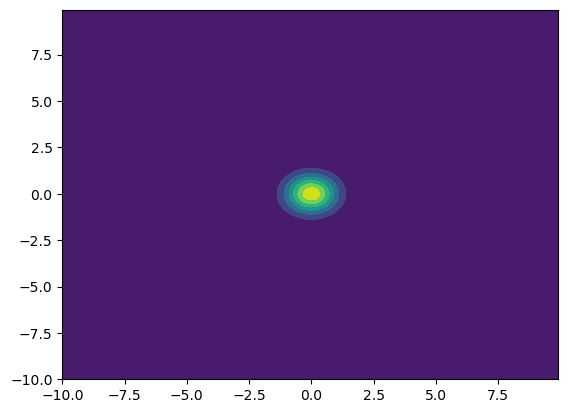

In [9]:
r = cp.sqrt(grid.x**2 + grid.y**2)
f = cp.exp(-r**2)

plt.contourf(grid.x.get(), grid.y.get(), f.get())

In [50]:
f_tensor = tc.tensor(f.get(), requires_grad=True)
fk = fft.fft2(f_tensor) * fft.fft2(f_tensor)
f_new = fft.ifft2(fk)

dfk_df = grad(fk.sum(), f_tensor)[0].real

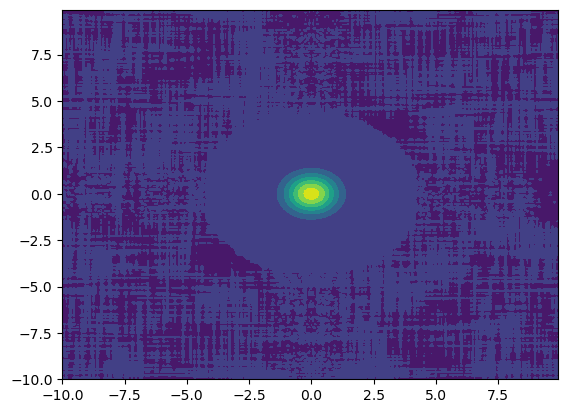

In [51]:
plt.contourf(grid.x.get(), grid.y.get(), dfk_df.detach().cpu())

/home/zhenyuwei/.conda/envs/mdpy/lib/python3.9/site-packages/torch/_tensor.py:958: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


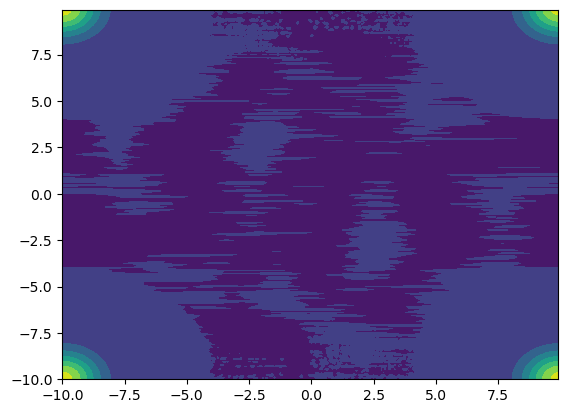

In [40]:
target = fft.fft2(f_tensor) * fft.fft2(f_tensor)
target = fft.ifft2(target) * 
plt.contourf(grid.x.get(), grid.y.get(), target.detach().cpu())